In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_excel('data\comfeatures.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
dongcode            32 non-null int64
dong                32 non-null object
totprice            32 non-null float64
rentprice           32 non-null int64
csvcount            32 non-null int64
supermarketcount    32 non-null int64
udong               32 non-null float64
mangocnt            32 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.1+ KB


In [5]:
data_points=df.values[:,2:]
data_points

array([[2272087735.84906, 145586, 8, 34, 20375931.5589354, 19504],
       [14005159685.5346, 189141, 48, 207, 105817821.292776, 64087],
       [4091010628.93082, 202561, 15, 9, 29945205.3231939, 39847],
       [6619925660.37736, 108725, 18, 29, 32818193.9163498, 112750],
       [2535593584.90566, 130071, 14, 16, 19359288.973384, 112750],
       [29269237044.0252, 263898, 91, 175, 188522003.802281, 684730],
       [1387391069.18239, 144527, 5, 7, 10618558.9353612, 2124],
       [3911023955.97484, 95828, 15, 15, 24438920.1520913, 25934],
       [9863280440.25157, 148404, 28, 65, 102314060.836502, 317974],
       [2560141069.18239, 214513, 7, 38, 26140239.5437262, 39852],
       [12990190503.1447, 197409, 53, 49, 154949752.851711, 555015],
       [1525510566.03774, 209853, 7, 9, 22522646.3878327, 32163],
       [5788059496.85535, 151725, 28, 40, 49988003.8022814, 32163],
       [2475137295.59748, 140215, 10, 23, 17119384.0304183, 69434],
       [9062022006.28931, 336315, 35, 121, 87332653

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(data_points)
data_transformed = mms.transform(data_points)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [8]:
Sum_of_squared_distances

[10.255977441578693,
 4.577359024121535,
 2.6832806571784964,
 1.8270160189554074,
 1.4139361661355236,
 1.1399270351975948,
 0.9188779536773657,
 0.7444922031170966,
 0.6291854999761941,
 0.5198951708788959,
 0.4190710459175202,
 0.3680730250850458,
 0.289073886772777,
 0.24093021008697263]

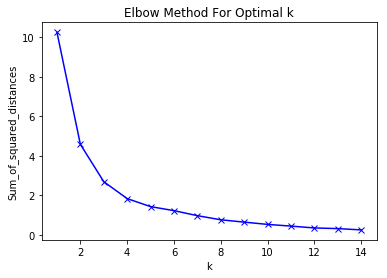

In [34]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
kmeans=KMeans(n_clusters=10).fit(data_points)

In [52]:
kmeans.labels_

array([8, 9, 0, 7, 8, 1, 4, 0, 2, 8, 6, 4, 7, 8, 2, 0, 7, 2, 0, 5, 7, 0,
       0, 4, 4, 4, 8, 8, 2, 3, 0, 6])

In [53]:
df['cluster_id']=kmeans.labels_

In [54]:
df

,dongcode,dong,totprice,rentprice,csvcount,supermarketcount,udong,mangocnt,cluster_id
0,11110600,가회동,2.272088e+09,145586,8,34,2.037593e+07,19504,8
1,11140590,광희동,1.400516e+10,189141,48,207,1.058178e+08,64087,9
2,11110580,교남동,4.091011e+09,202561,15,9,2.994521e+07,39847,0
3,11140625,다산동,6.619926e+09,108725,18,29,3.281819e+07,112750,7
4,11140665,동화동,2.535594e+09,130071,14,16,1.935929e+07,112750,8
5,11140550,명동,2.926924e+10,263898,91,175,1.885220e+08,684730,1
6,11110570,무악동,1.387391e+09,144527,5,7,1.061856e+07,2124,4
7,11110550,부암동,3.911024e+09,95828,15,15,2.443892e+07,25934,0
8,11110530,사직동,9.863280e+09,148404,28,65,1.023141e+08,317974,2
9,11110540,삼청동,2.560141e+09,214513,7,38,2.614024e+07,39852,8


In [58]:
df.to_excel(r"C:\Users\user\Desktop\BC\data\ten.xlsx")

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




x0=[]
y0=[]
z0=[]

x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

x3=[]
y3=[]
z3=[]

for i in range(len(df)):
    if df['cluster_id'][i]==0:
        x0.append(df['pop'][i])
        y0.append(df['workpop'][i])
        z0.append(df['facscore'][i])
    
    elif df['cluster_id'][i]==1:
        x1.append(df['pop'][i])
        y1.append(df['workpop'][i])
        z1.append(df['facscore'][i])
        
    elif df['cluster_id'][i]==2:
        x2.append(df['pop'][i])
        y2.append(df['workpop'][i])
        z2.append(df['facscore'][i])
    
    else:
        x3.append(df['pop'][i])
        y3.append(df['workpop'][i])
        z3.append(df['facscore'][i])

print(x0)
print(y0)
print(z0)

[358, 6675, 4833, 2040, 5664, 6045, 3346, 3812, 5932, 12113, 6740, 8818, 4407, 2239, 7773, 10739, 7786, 6949, 4552, 5509, 5140, 3765, 6615, 5224, 13206, 4884, 7171, 1772, 1675, 1893, 2758, 3378, 5952, 4934, 4047, 8580, 3621, 5952, 4241]
[3433, 4771, 1279, 2937, 910, 7133, 5495, 2490, 1689, 1393, 16635, 7620, 18263, 1382, 2112, 2203, 6980, 2017, 4943, 16357, 10179, 23014, 4644, 8702, 18126, 18567, 1309, 1423, 2672, 2009, 694, 1254, 2343, 1602, 2218, 3593, 6235, 4460, 9073]
[11, 14, 4, 21, 4, 5, 1, 14, 13, 34, 57, 102, 30, 3, 36, 42, 37, 31, 28, 1, 7, 51, 1, 43, 6, 98, 36, 31, 40, 28, 10, 23, 45, 48, 30, 9, 6, 25, 15]


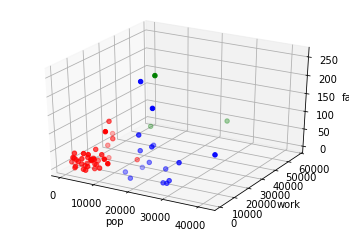

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x0, y0, z0, c='r')
ax.scatter(x1, y1, z1, c='b')
ax.scatter(x2, y2, z2, c='g')
ax.scatter(x3, y3, z3, c='c')

ax.set_xlabel('pop')
ax.set_ylabel('work')
ax.set_zlabel('fac')

plt.show()